# Observing intersecting gene variants across metistatic tumors

Two sets of samples have multiple metastases profiled. The sets include:

1. Patient A
  1. Primary Tumor - F0 Mouse (KS27)
  2. Primary Tumor - F5 Mouse (KS28)
  3. Liver Metastasis (post treatment) - F0 Mouse (KS29)
  4. Liver Metastasis (post treatment) - F5 Mouse (KS30)
2. Patient B
  1. Primary Tumor - F0 Mouse (008-F0)
  2. Primary Tumor - F5 Mouse (008-F5)
  3. Peritoneal Metastasis - F0 Mouse (018-F0)
  4. Peritoneal Metastasis - F5 Mouse (018-F5)
  5. Liver Metastasis - F0 Mouse (019-F0)
  6. Liver Metastasis - F5 Mouse (019-F5)
  7. Metastasis (Mouse 008-F8) - F0 Mouse (KS25)
  8. Metastasis (Mouse 008-F8) - F5 Mouse (KS26)
 
The script uses `UpSetR` to visualize overlapping gene variants across all passages within each patient

In [1]:
library(UpSetR)
library(reshape2)
library(dplyr)

Warning message:
“package ‘reshape2’ was built under R version 3.4.3”Warning message:
“package ‘dplyr’ was built under R version 3.4.3”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
cosmic_file <- file.path('results', 'all_cosmic_variants.tsv')
cosmic_df <- readr::read_tsv(cosmic_file)
head(cosmic_df)

Parsed with column specification:
cols(
  .default = col_character(),
  Start = col_integer(),
  End = col_integer(),
  depth = col_integer()
)
See spec(...) for full column specifications.


Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,⋯,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds,Otherinfo,het,quality,depth,sample_name
1,874779,874826,CCTCCCCAGCCACGGTGAGGACCCACCCTGGCATGATCCCCCTCATCA,-,exonic,SAMD11,.,nonframeshift deletion,SAMD11:NM_152486:exon7:c.645_692del:p.G220Dfs*447,⋯,.,.,.,.,.,het . 20,het,.,20,019-F0
1,26510311,26510311,C,-,exonic,CNKSR1,.,frameshift deletion,"CNKSR1:NM_001297647:exon9:c.866delC:p.P291Hfs*74,CNKSR1:NM_001297648:exon9:c.71delC:p.P26Hfs*74,CNKSR1:NM_006314:exon9:c.845delC:p.P284Hfs*74",⋯,.,.,.,.,.,het . 31,het,.,31,019-F0
1,158576883,158576883,G,A,exonic,OR10Z1,.,nonsynonymous SNV,OR10Z1:NM_001004478:exon1:c.G655A:p.A219T,⋯,0.917,0.949,0.822,0.761,4.671,het . 127,het,.,127,019-F0
1,159032487,159032487,T,-,exonic,AIM2,.,frameshift deletion,"AIM2:NM_001348247:exon5:c.712delA:p.T238HREVKRTNSSQLV,AIM2:NM_004833:exon6:c.1027delA:p.T343HREVKRTNSSQLV",⋯,.,.,.,.,.,het . 87,het,.,87,019-F0
1,183187613,183187613,C,T,exonic,LAMC2,.,nonsynonymous SNV,"LAMC2:NM_005562:exon4:c.C493T:p.R165C,LAMC2:NM_018891:exon4:c.C493T:p.R165C",⋯,0.871,0.841,0.998,0.995,16.012,het . 83,het,.,83,019-F0
1,208084350,208084350,G,A,exonic,CD34,.,synonymous SNV,"CD34:NM_001025109:exon1:c.C76T:p.L26L,CD34:NM_001773:exon1:c.C76T:p.L26L",⋯,.,.,.,.,.,het . 59,het,.,59,019-F0


Warning message:
“package ‘bindrcpp’ was built under R version 3.4.3”

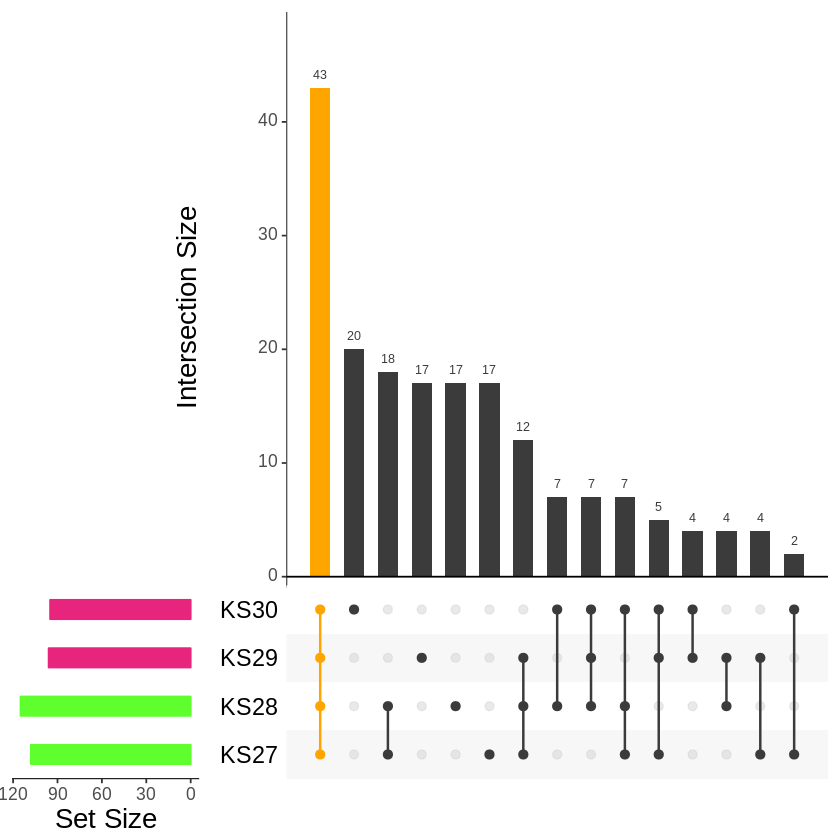

In [3]:
a_samples <- c('KS27', 'KS28', 'KS29', 'KS30')
patient_a <- cosmic_df %>% dplyr::filter(sample_name %in% a_samples)

a_melted <- reshape2::melt(patient_a, id.vars = 'sample_name', measure.vars = 'Gene.refGene')
a_pivot <- reshape2::dcast(a_melted, value ~ sample_name, fun.aggregate = function(x){ length(x) })
a_pivot[a_pivot == 2] <- 1

upset(a_pivot, order.by = 'freq', sets = a_samples, keep.order = TRUE,
      queries = list(list(query = intersects, params = list(a_samples),
                          color='orange', active=T)), mb.ratio = c(0.7, 0.3),
      sets.bar.color = c("#5eff2d", "#5eff2d", "#e8257c", "#e8257c"),
      text.scale = c(2, 1.5, 2, 1.5, 2, 1.2))

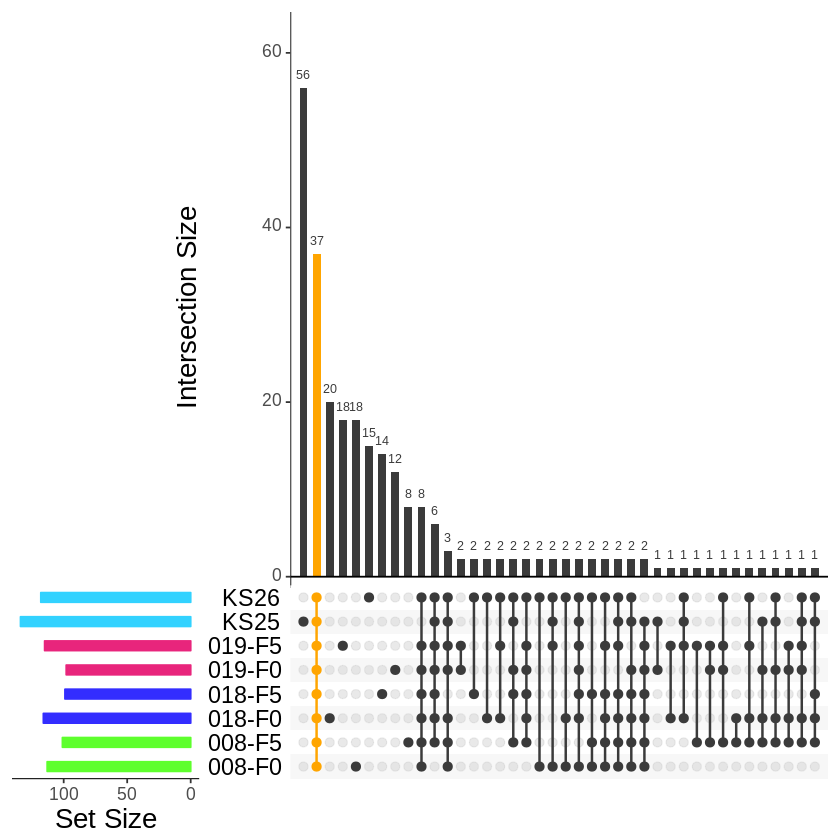

In [4]:
b_samples <- c('008-F0', '008-F5', '018-F0', '018-F5', '019-F0', '019-F5', 'KS25', 'KS26')
patient_b <- cosmic_df %>% dplyr::filter(sample_name %in% b_samples)

b_melted <- reshape2::melt(patient_b, id.vars = 'sample_name', measure.vars = 'Gene.refGene')
b_pivot <- reshape2::dcast(b_melted, value ~ sample_name, fun.aggregate = function(x){ length(x) })
b_pivot[b_pivot == 2] <- 1

upset(b_pivot, order.by = 'freq', sets = b_samples, keep.order = TRUE,
      queries = list(list(query = intersects, params = list(b_samples),
                          color='orange', active=T)), mb.ratio = c(0.7, 0.3),
      sets.bar.color = c("#5eff2d", "#5eff2d", "#332dff", "#332dff",
                         "#e8257c", "#e8257c", "#32d2ff", "#32d2ff"),
      text.scale = c(2, 1.5, 2, 1.5, 2, 1.2))

In [5]:
upset_a_file <- file.path('figures', 'upset_sample_a.pdf')
pdf(upset_a_file, height = 6, width = 7)
upset(a_pivot, order.by = 'freq', sets = a_samples, keep.order = TRUE,
      queries = list(list(query = intersects, params = list(a_samples),
                          color='orange', active=T)), mb.ratio = c(0.7, 0.3),
      sets.bar.color = c("#5eff2d", "#5eff2d", "#e8257c", "#e8257c"),
      text.scale = c(2, 1.5, 2, 1.5, 2, 1.2))
dev.off()
dev.off()

png 
  2

null device 
          1

In [6]:
upset_b_file <- file.path('figures', 'upset_sample_b.pdf')
pdf(upset_b_file, height = 6, width = 7)
upset(b_pivot, order.by = 'freq', sets = b_samples, keep.order = TRUE,
      queries = list(list(query = intersects, params = list(b_samples),
                          color='orange', active=T)), mb.ratio = c(0.7, 0.3),
      sets.bar.color = c("#5eff2d", "#5eff2d", "#332dff", "#332dff",
                         "#e8257c", "#e8257c", "#32d2ff", "#32d2ff"),
      text.scale = c(2, 1.5, 2, 1.5, 2, 1.2))
dev.off()
dev.off()

png 
  2

null device 
          1